In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'BPI_Challenge_2012-training.csv')

In [6]:
df.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
4,4294967296,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256


In [25]:
events = []
for event in df['event concept:name']:
    if event not in events:
        events.append(event)
print(events)
len(events)

['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'A_DECLINED', 'W_Afhandelen leads', 'A_ACCEPTED', 'O_SELECTED', 'A_FINALIZED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes', 'O_CANCELLED', 'A_CANCELLED', 'W_Beoordelen fraude', 'O_SENT_BACK', 'W_Valideren aanvraag', 'W_Nabellen incomplete dossiers', 'O_ACCEPTED', 'A_APPROVED', 'A_ACTIVATED', 'A_REGISTERED', 'O_DECLINED', 'W_Wijzigen contractgegevens']


24

## Start concept name

In [34]:
df['case REG_DATE']=pd.to_datetime(df['case REG_DATE'], format='%Y-%m-%d %H:%M:%S.%f', utc=True)

In [35]:
df_start=df[df['event concept:name']=='A_SUBMITTED']

In [36]:
df_start.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-09-30 22:38:44.546000+00:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
4,4294967296,173691,2011-10-01 06:08:58.256000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256
8,8589934592,173694,2011-10-01 06:10:30.287000+00:00,7000,A_SUBMITTED,COMPLETE,01-10-2011 08:10:30.287
10,12884901888,173697,2011-10-01 06:11:08.865000+00:00,15000,A_SUBMITTED,COMPLETE,01-10-2011 08:11:08.866
15,17179869184,173700,2011-10-01 06:15:39.894000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:15:39.894


In [37]:
df_start['y-m-d'] = df_start['case REG_DATE'].dt.strftime('%y-%m-%d')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_start.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,y-m-d
0,0,173688,2011-09-30 22:38:44.546000+00:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546,11-09-30
4,4294967296,173691,2011-10-01 06:08:58.256000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256,11-10-01
8,8589934592,173694,2011-10-01 06:10:30.287000+00:00,7000,A_SUBMITTED,COMPLETE,01-10-2011 08:10:30.287,11-10-01
10,12884901888,173697,2011-10-01 06:11:08.865000+00:00,15000,A_SUBMITTED,COMPLETE,01-10-2011 08:11:08.866,11-10-01
15,17179869184,173700,2011-10-01 06:15:39.894000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:15:39.894,11-10-01


In [39]:
df_dates=df_start.groupby('y-m-d').nunique()

In [40]:
df_dates

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,y-m-d
y-m-d,,,,,,,,
11-09-30,1,1,1,1,1,1,1,1
11-10-01,44,44,44,21,1,1,44,1
11-10-02,48,48,48,23,1,1,48,1
11-10-03,109,109,109,43,1,1,109,1
11-10-04,82,82,82,35,1,1,82,1
11-10-05,126,126,126,44,1,1,126,1
11-10-06,81,81,81,34,1,1,81,1
11-10-07,91,91,91,32,1,1,91,1
11-10-08,44,44,44,26,1,1,44,1


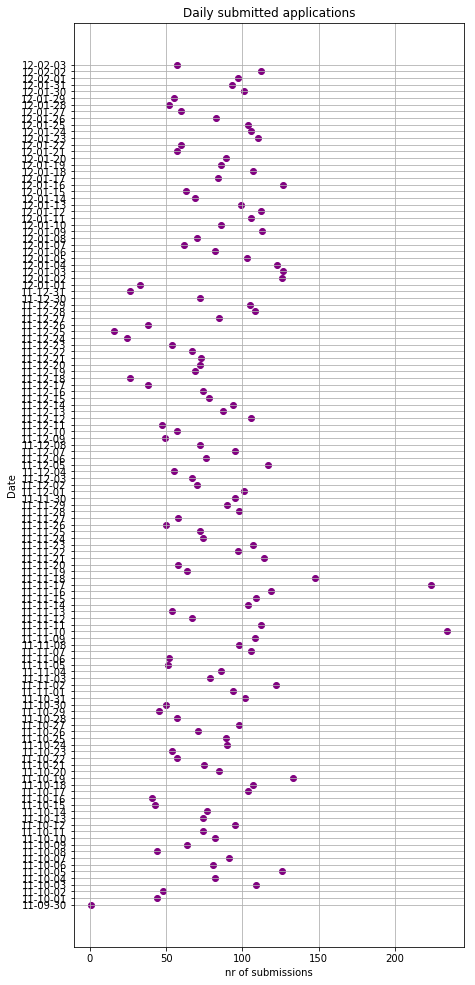

In [41]:
fig, ax = plt.subplots(figsize=(7, 17))
ax.scatter(df_dates['eventID '],
           df_dates.index.values,
        color='purple')
ax.set(ylabel="Date",
       xlabel="nr of submissions",
       title="Daily submitted applications")
plt.grid()
plt.show()

## Declined concept name

In [4]:
df_declined=df[df['event concept:name']=='A_DECLINED']

In [5]:
df_declined.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
14,12884901890,173697,2011-10-01T08:11:08.865+02:00,15000,A_DECLINED,COMPLETE,01-10-2011 08:11:46.420
17,17179869186,173700,2011-10-01T08:15:39.894+02:00,5000,A_DECLINED,COMPLETE,01-10-2011 08:16:21.037
115,55834574850,173727,2011-10-01T12:08:46.663+02:00,10000,A_DECLINED,COMPLETE,01-10-2011 12:09:30.362
186,64424509444,173733,2011-10-01T12:39:34.037+02:00,6000,A_DECLINED,COMPLETE,01-10-2011 14:54:53.037
192,25769803788,173706,2011-10-01T09:45:37.274+02:00,18000,A_DECLINED,COMPLETE,01-10-2011 14:59:58.557


## Approved 

In [26]:
df_approved=df[df['event concept:name']=='A_APPROVED']

In [27]:
df_approved.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
1302,579820584980,174105,2011-10-03T14:24:26.607+02:00,5000,A_APPROVED,COMPLETE,03-10-2011 14:46:47.625
2103,549755813925,174084,2011-10-03T13:26:26.927+02:00,8400,A_APPROVED,COMPLETE,04-10-2011 10:17:26.249
3464,1232655613972,174602,2011-10-05T09:27:11.793+02:00,6000,A_APPROVED,COMPLETE,05-10-2011 10:36:28.969
6446,893353197635,174337,2011-10-04T10:04:38.573+02:00,30000,A_APPROVED,COMPLETE,07-10-2011 14:24:37.816
8612,2126008811555,175248,2011-10-07T09:17:14.997+02:00,14000,A_APPROVED,COMPLETE,10-10-2011 14:09:53.709


## Declined VS Start & Approved

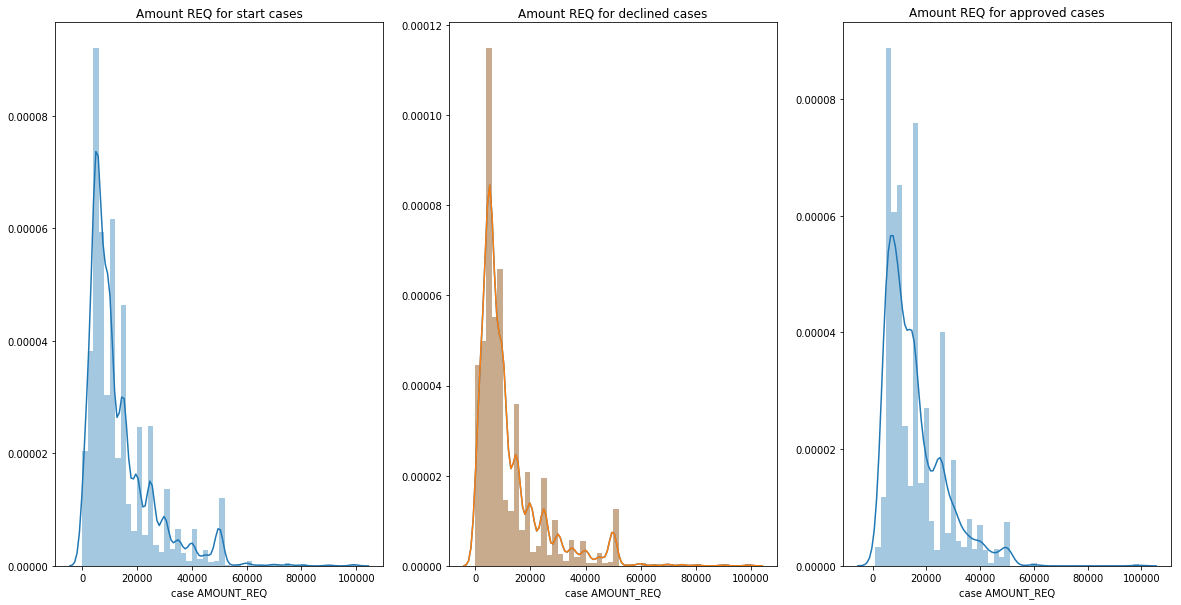

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=False, figsize = (20,10))
sns.distplot(df_start['case AMOUNT_REQ'], ax=ax[0,0])
sns.distplot(df_declined['case AMOUNT_REQ'], ax=ax[0,1])
sns.distplot(df_approved['case AMOUNT_REQ'], ax=ax[0,2])
sns.distplot(df_declined['case AMOUNT_REQ'], ax=ax[0,1])
ax[0,0].set_title('Amount REQ for start cases')
ax[0,1].set_title('Amount REQ for declined cases')
ax[0,2].set_title('Amount REQ for approved cases');

In [23]:
df_declined['case AMOUNT_REQ'].describe()

count     6152.000000
mean     12142.692783
std      12177.478687
min          1.000000
25%       5000.000000
50%       8000.000000
75%      15000.000000
max      99999.000000
Name: case AMOUNT_REQ, dtype: float64

In [24]:
df_start['case AMOUNT_REQ'].describe()

count    10469.000000
mean     13431.991212
std      12099.352876
min          0.000000
25%       5000.000000
50%      10000.000000
75%      17000.000000
max      99999.000000
Name: case AMOUNT_REQ, dtype: float64

In [33]:
df_approved['case AMOUNT_REQ'].describe()

count     1871.000000
mean     15326.194548
std      10601.936974
min       1000.000000
25%       7500.000000
50%      12500.000000
75%      20000.000000
max      99000.000000
Name: case AMOUNT_REQ, dtype: float64

## Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214377 entries, 0 to 214376
Data columns (total 7 columns):
eventID                       214377 non-null int64
case concept:name             214377 non-null int64
case REG_DATE                 214377 non-null object
case AMOUNT_REQ               214377 non-null int64
event concept:name            214377 non-null object
event lifecycle:transition    214377 non-null object
event time:timestamp          214377 non-null object
dtypes: int64(3), object(4)
memory usage: 11.4+ MB


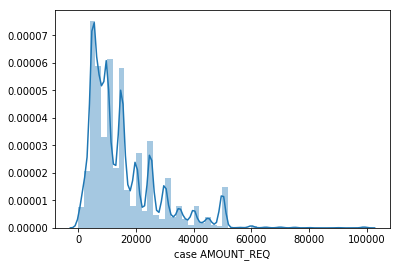

In [11]:
sns.distplot(df['case AMOUNT_REQ']);

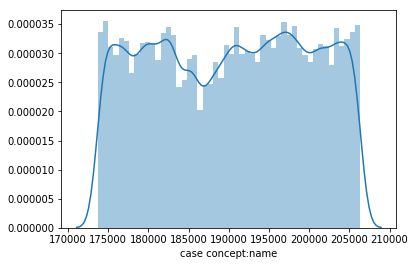

In [21]:
sns.distplot(df['case concept:name']);

In [7]:
df['case REG_DATE'].head()

0    2011-10-01T00:38:44.546+02:00
1    2011-10-01T00:38:44.546+02:00
2    2011-10-01T00:38:44.546+02:00
3    2011-10-01T00:38:44.546+02:00
4    2011-10-01T08:08:58.256+02:00
Name: case REG_DATE, dtype: object

In [12]:
df['case REG_DATE']=pd.to_datetime(df['case REG_DATE'], format='%Y-%m-%d %H:%M:%S.%f', utc=True)

In [13]:
df['case REG_DATE'].head()

0   2011-09-30 22:38:44.546000+00:00
1   2011-09-30 22:38:44.546000+00:00
2   2011-09-30 22:38:44.546000+00:00
3   2011-09-30 22:38:44.546000+00:00
4   2011-10-01 06:08:58.256000+00:00
Name: case REG_DATE, dtype: datetime64[ns, UTC]

In [17]:
df_steps=df.groupby('case concept:name').count()
df_steps.head()

,eventID,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
case concept:name,,,,,,
173688,26,26,26,26,26,26
173691,39,39,39,39,39,39
173694,59,59,59,59,59,59
173697,3,3,3,3,3,3
173700,3,3,3,3,3,3


In [18]:
df_steps.describe()

,eventID,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,20.477314,20.477314,20.477314,20.477314,20.477314,20.477314
std,20.516212,20.516212,20.516212,20.516212,20.516212,20.516212
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
max,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000


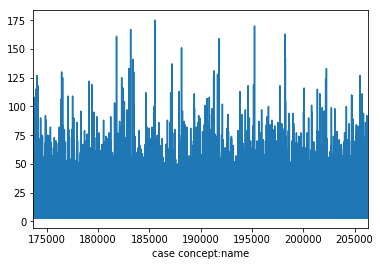

In [20]:
df_steps['eventID '].plot();

## General code

In [8]:
def open_data(line):
    
    df = pd.read_csv(line) 
    return df


In [12]:
def describe_data(line):
    
    df = pd.read_csv(line) 
    return df.describe()
    

In [24]:
def count_length(line):
    
    df = pd.read_csv(line) 
    return df.count()

In [31]:
def are_there_nan_values(line):
    
    df = pd.read_csv(line) 
    df1 = df.copy()
    df1.dropna()
    
    if len(df) == len(df1):
        return "There are no NaN values in this dataset"
    if len(df) > len(df1):
        x = len(df) - len(df1)
        return f"There are {x} NaN values"
    else:
        return False 


In [33]:
def dropna(line):
    
    df = pd.read_csv(line) 
    df.dropna()
    return df

In [27]:
def plot_amount(line):
    
    df = pd.read_csv(line) 
    df.dropna()
    plot = sns.distplot(df['case AMOUNT_REQ'])
    return plot;
    

In [34]:
def steps(line):
    
    df = pd.read_csv(line) 
    df.dropna()
    df_steps=df.groupby('case concept:name').count()
    plot = df_steps['eventID '].plot()
    return plot;
    

In [33]:
'''def dataframe_steps(line):
    
    df = pd.read_csv(line) 
    df.dropna()
    df['case REG_DATE'] = df['case REG_DATE'].astype('str')
    df_steps=df.groupby('case concept:name').count()
    return df_steps'''

,eventID,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
case concept:name,,,,,,
173688,26,26,26,26,26,26
173691,39,39,39,39,39,39
173694,59,59,59,59,59,59
173697,3,3,3,3,3,3
173700,3,3,3,3,3,3
173703,9,9,9,9,9,9
173706,14,14,14,14,14,14
173709,12,12,12,12,12,12
173712,14,14,14,14,14,14


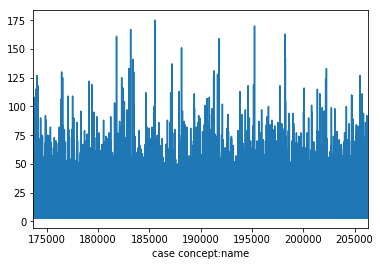

In [32]:
steps('BPI_Challenge_2012-training.csv')

In [69]:
def date_conversion(data, arg):
    df = pd.read_csv(data)
    df[arg]=pd.to_datetime(df[arg], format='%Y-%m-%d %H:%M:%S.%f', utc=True)
    return df.info()

In [70]:
date_conversion("BPI_Challenge_2012-training.csv", "case REG_DATE")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214377 entries, 0 to 214376
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   eventID                     214377 non-null  int64              
 1   case concept:name           214377 non-null  int64              
 2   case REG_DATE               214377 non-null  datetime64[ns, UTC]
 3   case AMOUNT_REQ             214377 non-null  int64              
 4   event concept:name          214377 non-null  object             
 5   event lifecycle:transition  214377 non-null  object             
 6   event time:timestamp        214377 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 11.4+ MB


In [73]:
def subm_start_date(data):
    df = pd.read_csv(data)
    df["case REG_DATE"]=pd.to_datetime(df["case REG_DATE"], format='%Y-%m-%d %H:%M:%S.%f', utc=True)
    df_start=df[df['event concept:name']=='A_SUBMITTED']
    df_start['y-m-d'] = df_start['case REG_DATE'].dt.strftime('%y-%m-%d')
    df_dates=df_start.groupby('y-m-d').nunique()
    fig, ax = plt.subplots(figsize=(7, 15))
    ax.scatter(df_dates['eventID '],
           df_dates.index.values,
        color='purple')
    ax.set(ylabel="Date",
       xlabel="nr of submissions",
       title="Daily submitted applications")
    plt.grid()
    plt.show()
    return df_start

C:\Users\anabi\Anaconda03\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


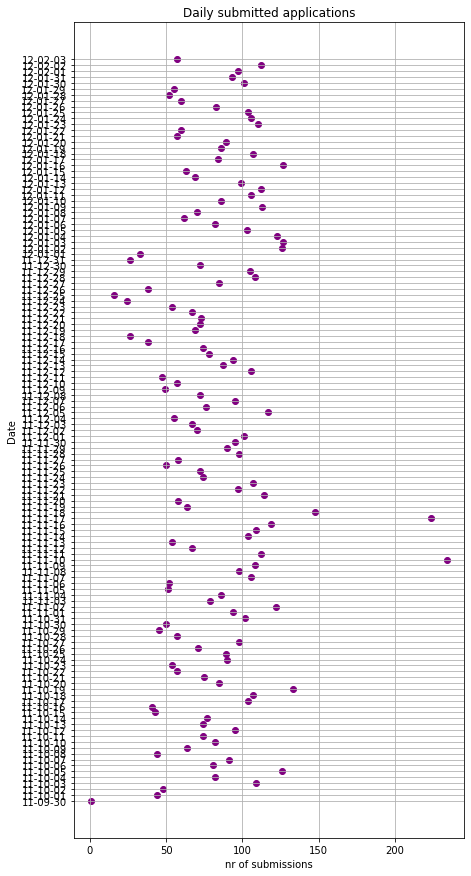

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,y-m-d
0,0,173688,2011-09-30 22:38:44.546000+00:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546,11-09-30
4,4294967296,173691,2011-10-01 06:08:58.256000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256,11-10-01
8,8589934592,173694,2011-10-01 06:10:30.287000+00:00,7000,A_SUBMITTED,COMPLETE,01-10-2011 08:10:30.287,11-10-01
10,12884901888,173697,2011-10-01 06:11:08.865000+00:00,15000,A_SUBMITTED,COMPLETE,01-10-2011 08:11:08.866,11-10-01
15,17179869184,173700,2011-10-01 06:15:39.894000+00:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:15:39.894,11-10-01
...,...,...,...,...,...,...,...,...
199607,44942537785344,206309,2012-02-03 15:34:31.683000+00:00,6800,A_SUBMITTED,COMPLETE,03-02-2012 16:34:31.683,12-02-03
199635,44946832752640,206312,2012-02-03 15:55:31.097000+00:00,22000,A_SUBMITTED,COMPLETE,03-02-2012 16:55:31.097,12-02-03
199646,44951127719936,206315,2012-02-03 16:04:58.182000+00:00,7000,A_SUBMITTED,COMPLETE,03-02-2012 17:04:58.182,12-02-03
199650,44955422687232,206318,2012-02-03 16:07:38.334000+00:00,5000,A_SUBMITTED,COMPLETE,03-02-2012 17:07:38.334,12-02-03


In [74]:
subm_start_date("BPI_Challenge_2012-training.csv")